# Prepare training and testing sets of images

## 1. Image inversion set 20x20

In [60]:
import matplotlib
%matplotlib inline

from scipy import misc
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import math

In [69]:
IMSIZE=20

# Invert grayscale PIL image
def invert_array(arr):
    inverted_arr = 1 - arr
    return inverted_arr

def generate_matrixes():
    src_matrix = np.random.rand(IMSIZE,IMSIZE)
    # Generate mixed matrix
    mixm = np.zeros((IMSIZE,IMSIZE))
    #print mixm[:5,:5]
    a1 = randint(0,math.ceil(IMSIZE-IMSIZE/2))
    a2 = randint(a1+1,IMSIZE-1)
    mixm[a1:a2,a1:a2] = src_matrix[a1:a2,a1:a2]
    #print(str(a1) + "x" + str(a2))
    invt = invert_array(mixm)
    return mixm, invt

### draw image

In [70]:
#plt.imshow(src_matrix, cmap=plt.cm.Greys) 
#plt.show()
def plot_matrixes(m1, m2):
    plt.figure(1)
    plt.subplot(121)
    plt.imshow(m1, cmap=plt.cm.Greys,interpolation='none')

    plt.subplot(122)
    plt.imshow(m2, cmap=plt.cm.Greys,interpolation='none')
    plt.show()


#DPI = 150
#_, (ax1, ax2) = plt.subplots(1, 2, figsize=(IMSIZE/DPI,IMSIZE/DPI),  dpi=DPI)
#ax1.imshow(src_matrix, cmap=plt.cm.Greys)
#ax2.imshow(diag, cmap=plt.cm.Greys)

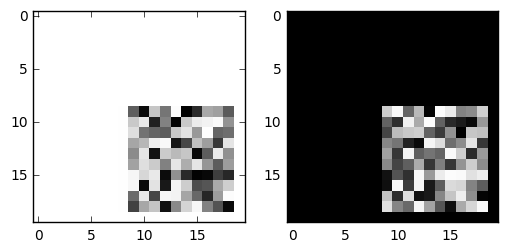

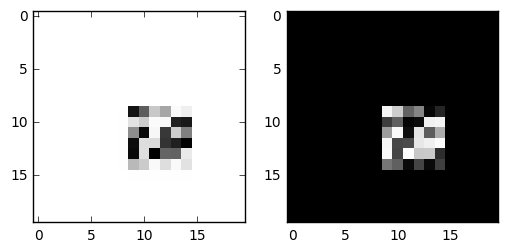

In [71]:
for i in range(1,3):
    a,b = generate_matrixes()
    plot_matrixes(a,b)

In [72]:
from PIL import Image
def array_2_image(arr):
    MAX = 255
    arr_scaled = (arr) * MAX
    #arr_max = np.amax(arr_scaled)
    #arr_min = np.amin(arr_scaled)
    #print ("Array Max/min:"+ str(arr_max)+"/"+str(arr_min))
    im = Image.fromarray(arr_scaled)
    return im

## Generate image set

In [74]:
import os
from PIL import Image
samples=1000
DIR = "imgset20x20x"+str(samples)
if not os.path.exists(DIR):
    os.makedirs(DIR)
for i in range(0,samples):
    image_str = str(i+1).zfill(6)
    a,b = generate_matrixes()
    a_im = array_2_image(a)
    b_im = array_2_image(b)
    a_filename = DIR+"/inverse_"+image_str+".gif"
    a_im.save(a_filename, "GIF")
    b_filename = DIR+"/origin_"+image_str+".gif"
    b_im.save(b_filename, "GIF")